In [2]:
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np
import matplotlib.pyplot as plt

In [3]:
model = Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 100)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 100)       90100     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 100)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 129600)            0         
                                                                 
 dropout (Dropout)           (None, 129600)            0

In [4]:
TRAINING_DIR = "./train"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))
VALIDATION_DIR = "./test"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 1083 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [5]:
train_generator[0]

(array([[[[0.9361857 , 0.8611097 , 0.7647481 ],
          [0.9306649 , 0.87037945, 0.7899989 ],
          [0.9778189 , 0.9342733 , 0.8838245 ],
          ...,
          [0.9725491 , 0.93725497, 0.8705883 ],
          [0.9725491 , 0.93725497, 0.8705883 ],
          [0.9725491 , 0.93725497, 0.8705883 ]],
 
         [[0.92241406, 0.8489582 , 0.75340676],
          [0.9460567 , 0.89063185, 0.81673205],
          [0.9802492 , 0.9383238 , 0.8935456 ],
          ...,
          [0.9725491 , 0.93725497, 0.8705883 ],
          [0.9725491 , 0.93725497, 0.8705883 ],
          [0.9725491 , 0.93725497, 0.8705883 ]],
 
         [[0.9086425 , 0.83680683, 0.7420654 ],
          [0.9614485 , 0.91088426, 0.8434652 ],
          [0.9826795 , 0.9423742 , 0.9032668 ],
          ...,
          [0.9725491 , 0.93725497, 0.8705883 ],
          [0.9725491 , 0.93725497, 0.8705883 ],
          [0.9725491 , 0.93725497, 0.8705883 ]],
 
         ...,
 
         [[0.9526058 , 0.96205205, 0.9638583 ],
          [0.94134

In [5]:
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [6]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

<ipython-input-6-6272b23e5a0b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
109/109 [==============================] - 126s 1s/step - loss: 0.6546 - acc: 0.6620 - val_loss: 0.2770 - val_acc: 0.9124
Epoch 2/10
109/109 [==============================] - 121s 1s/step - loss: 0.3693 - acc: 0.8578 - val_loss: 0.1595 - val_acc: 0.9330
Epoch 3/10
109/109 [==============================] - 122s 1s/step - loss: 0.2928 - acc: 0.8818 - val_loss: 0.1524 - val_acc: 0.9330
Epoch 4/10
109/109 [==============================] - 122s 1s/step - loss: 0.2232 - acc: 0.9160 - val_loss: 0.0946 - val_acc: 0.9485
Epoch 5/10
109/109 [==============================] - 118s 1s/step - loss: 0.2418 - acc: 0.8957 - val_loss: 0.1008 - val_acc: 0.9588
Epoch 6/10
109/109 [==============================] - 117s 1s/step - loss: 0.2128 - acc: 0.9197 - val_loss: 0.1037 - val_acc: 0.9536
Epoch 7/10
109/109 [==============================] - 116s 1s/step - loss: 0.1906 - acc: 0.9307 - val_loss: 0.1060 - val_acc: 0.9536
Epoch 8/10
109/109 [==============================] - 117s 1s/step - 

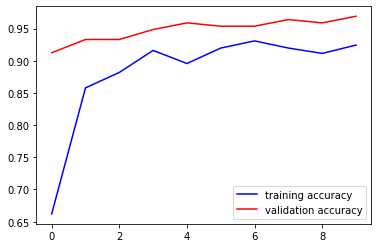

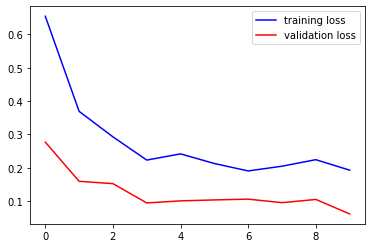

In [12]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="training accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="training loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [ ]:
model.save("drowiness_new6.h5")

In [1]:
labels_new = ['Mask', 'No mask']

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), prediction, target_names=labels_new))